In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow.keras.utils import plot_model

# 모델

In [2]:
# GPU 메모리제한
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*7)])
    except RuntimeError as e:
        # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
        print(e)

In [ ]:
# 모델 작성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv3D, MaxPool3D,Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import l2

model_name = '모델_3_1'

weight_decay = 0.005
num_class = 26
input_shape=(112,112)
channel_num = 3

model = Sequential()
model.add(Conv3D(64,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=input_shape+(frame_num, channel_num)))
model.add(MaxPool3D((2,2,1),strides=(2,2,1),padding='same'))

model.add(Conv3D(128,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(256,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(Conv3D(256,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(512,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(Conv3D(512,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(512,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(Conv3D(512,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Flatten())
model.add(Dense(units=int(4096), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=int(4096), activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_class, activation='softmax'))
model.summary()

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy',metrics=['accuracy'])

In [3]:
# 모델 작성_축약
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv3D, MaxPool3D,Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import l2

model_name = '모델2_13'

weight_decay = 0.005
frame_num = 16
num_class = 26
input_shape=(112,112)
channel_num = 3

model = Sequential()
model.add(Conv3D(64,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay),
                 input_shape=input_shape+(frame_num, channel_num)))
model.add(MaxPool3D((2,2,1),strides=(2,2,1),padding='same'))

model.add(Conv3D(128,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))
model.add(Conv3D(128,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(256,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Conv3D(256,(3,3,3), strides=(1,1,1), padding='same',
                 activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2),padding='same'))

model.add(Flatten())
model.add(Dense(units=int(2048), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=int(2048), activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_class, activation='softmax'))
model.summary()

model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 112, 112, 16, 64)  5248      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 56, 56, 16, 64)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 56, 56, 16, 128)   221312    
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 28, 28, 8, 128)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 28, 28, 8, 128)    442496    
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 14, 14, 4, 128)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 14, 14, 4, 256)    8

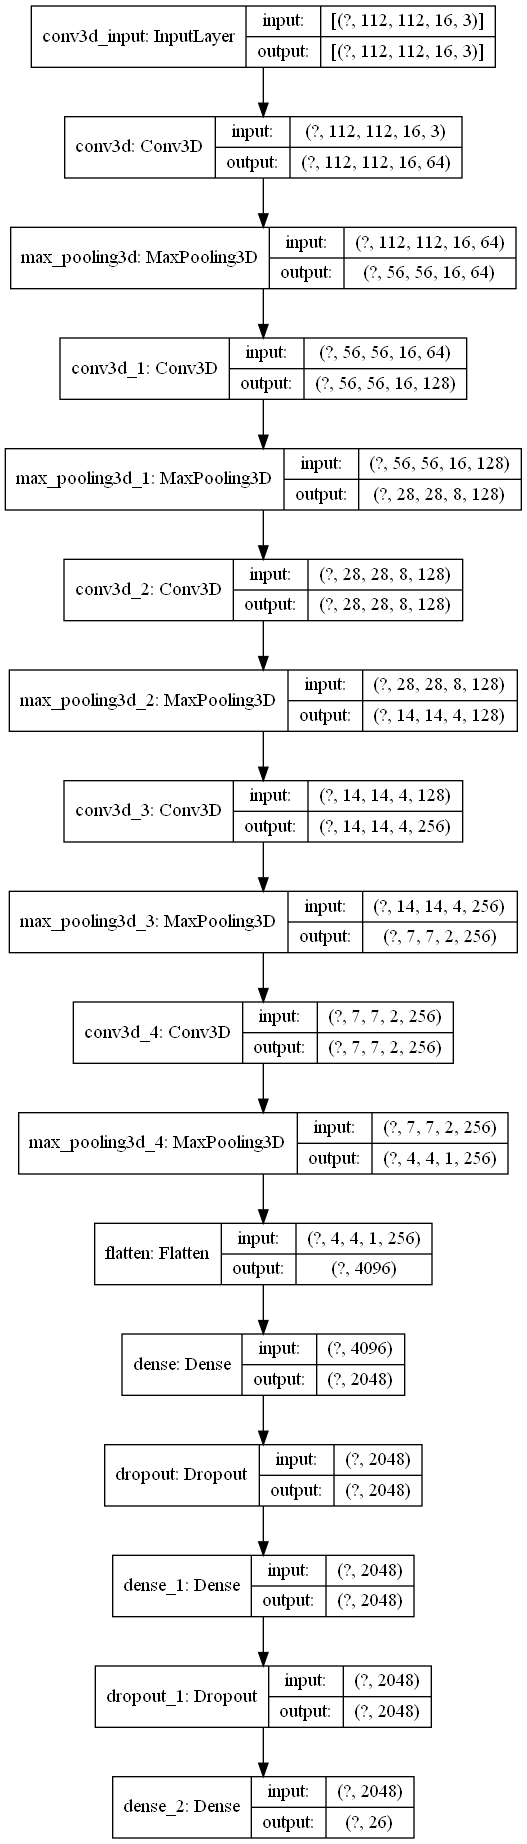

In [4]:
plot_model(model, show_shapes=True, rankdir='TB', dpi=96, 
           to_file=f'../data/models/{model_name}.png')

In [5]:
# 학습
base_dir = '../data/pre'
folder_list = os.listdir(base_dir)

batch_size = 1
shuffle_list = list(range(0,num_class))*batch_size

history_dict = {'acc':list(), 'val_acc':list(), 'loss':list(), 'val_loss':list()}

# early stopping용 변수
loss_f = 100000
count = 0
patience = 20
threshold = 0.0005

for batch in range(int(len(folder_list)/batch_size)):
    batch_x_data = list()
    batch_t_data = list()
    for folder in folder_list[batch*batch_size:(batch+1)*batch_size]:
        for n in range(num_class):
            file_dir = os.path.join(base_dir, (folder+'/'+str(n)))
            file_list = os.listdir(os.path.join(base_dir, (folder+'/'+str(n))))
            temp_data = list()
            a = np.random.normal()/10
            for file in file_list:
                img = cv2.imread(os.path.join(file_dir, file))
                img = np.array(img)
                # 정규화
                img = img/255
                temp_data.append(img)
            temp_data = np.array(temp_data)
            batch_x_data.append(temp_data)
            batch_t_data.append(n)

    # 리스트인 batch_x_data를 ndarray로
    batch_x_data = np.array(batch_x_data)
    batch_t_data = np.array(batch_t_data)

    # 축변경
    batch_x_data = np.swapaxes(batch_x_data,1,2)
    batch_x_data = np.swapaxes(batch_x_data,2,3)

    # data shuffle
    random.shuffle(shuffle_list)

    batch_x_data = batch_x_data[shuffle_list]
    batch_t_data = batch_t_data[shuffle_list]

    # one_hot_encording
    batch_t_data = np.array(batch_t_data)
    batch_t_data = pd.DataFrame(batch_t_data, columns=['t'])
    batch_t_data = pd.get_dummies(batch_t_data['t'])
    
    # learning
    history = model.fit(x=batch_x_data, y=batch_t_data.values, epochs=3, verbose=1, validation_split=0.3)    
    history_dict['acc'].append(history.history['accuracy']) 
    history_dict['val_acc'].append(history.history['val_accuracy'])
    
    history_dict['loss'].append(history.history['loss'])
    history_dict['val_loss'].append(history.history['val_loss'])
    
    
    # early stopping구현
    loss_r = np.mean(history.history['loss'])
    if loss_f - loss_r <= threshold:
        count += 1
        if count >= patience:
            break
        else:
            loss_f = loss_r
    else:
        loss_f = loss_r

Epoch 1/3
1/1 [==============================] - 1s 549ms/step - loss: 6.4731 - accuracy: 0.0556 - val_loss: 6.5486 - val_accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 1s 518ms/step - loss: 6.4186 - accuracy: 0.0000e+00 - val_loss: 6.6048 - val_accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 480ms/step - loss: 6.3226 - accuracy: 0.0000e+00 - val_loss: 6.7545 - val_accuracy: 0.0000e+00
Epoch 1/3
1/1 [==============================] - 0s 479ms/step - loss: 6.3890 - accuracy: 0.0556 - val_loss: 6.3454 - val_accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 448ms/step - loss: 6.3130 - accuracy: 0.1111 - val_loss: 6.3440 - val_accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 484ms/step - loss: 6.2277 - accuracy: 0.0556 - val_loss: 6.3764 - val_accuracy: 0.0000e+00
Epoch 1/3
1/1 [==============================] - 0s 470ms/step - loss: 6.2502 - accuracy: 0.0000e+00 - val_loss: 6.2508 - val_accuracy

1/1 [==============================] - 0s 475ms/step - loss: 4.4612 - accuracy: 0.4444 - val_loss: 5.2877 - val_accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 453ms/step - loss: 4.5953 - accuracy: 0.4444 - val_loss: 5.1991 - val_accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 452ms/step - loss: 4.6827 - accuracy: 0.1111 - val_loss: 5.3954 - val_accuracy: 0.0000e+00
Epoch 1/3
1/1 [==============================] - 0s 493ms/step - loss: 4.5895 - accuracy: 0.3333 - val_loss: 4.5081 - val_accuracy: 0.2500
Epoch 2/3
1/1 [==============================] - 0s 450ms/step - loss: 4.7394 - accuracy: 0.1111 - val_loss: 4.7650 - val_accuracy: 0.2500
Epoch 3/3
1/1 [==============================] - 0s 450ms/step - loss: 4.4457 - accuracy: 0.2222 - val_loss: 4.8904 - val_accuracy: 0.2500
Epoch 1/3
1/1 [==============================] - 0s 475ms/step - loss: 4.0858 - accuracy: 0.5000 - val_loss: 4.5159 - val_accuracy: 0.1250
Epoch 2/3
1/1 [==========

1/1 [==============================] - 0s 473ms/step - loss: 4.4911 - accuracy: 0.2778 - val_loss: 5.0118 - val_accuracy: 0.1250
Epoch 3/3
1/1 [==============================] - 0s 477ms/step - loss: 4.2219 - accuracy: 0.3333 - val_loss: 5.2548 - val_accuracy: 0.1250
Epoch 1/3
1/1 [==============================] - 1s 501ms/step - loss: 4.7576 - accuracy: 0.2222 - val_loss: 4.6653 - val_accuracy: 0.1250
Epoch 2/3
1/1 [==============================] - 0s 478ms/step - loss: 4.3798 - accuracy: 0.4444 - val_loss: 4.8034 - val_accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 477ms/step - loss: 4.1482 - accuracy: 0.3889 - val_loss: 4.9278 - val_accuracy: 0.0000e+00
Epoch 1/3
1/1 [==============================] - 1s 514ms/step - loss: 4.1615 - accuracy: 0.2222 - val_loss: 4.5702 - val_accuracy: 0.2500
Epoch 2/3
1/1 [==============================] - 0s 474ms/step - loss: 4.3283 - accuracy: 0.2778 - val_loss: 4.7143 - val_accuracy: 0.2500
Epoch 3/3
1/1 [==============

Epoch 1/3
1/1 [==============================] - 0s 499ms/step - loss: 5.0086 - accuracy: 0.2222 - val_loss: 3.3722 - val_accuracy: 0.8750
Epoch 2/3
1/1 [==============================] - 0s 475ms/step - loss: 2.7908 - accuracy: 0.7778 - val_loss: 3.0505 - val_accuracy: 0.7500
Epoch 3/3
1/1 [==============================] - 0s 477ms/step - loss: 2.7011 - accuracy: 0.7222 - val_loss: 3.0440 - val_accuracy: 0.7500
Epoch 1/3
1/1 [==============================] - 1s 500ms/step - loss: 2.6824 - accuracy: 0.7778 - val_loss: 2.5553 - val_accuracy: 0.8750
Epoch 2/3
1/1 [==============================] - 0s 475ms/step - loss: 2.3762 - accuracy: 0.7222 - val_loss: 2.8542 - val_accuracy: 0.6250
Epoch 3/3
1/1 [==============================] - 0s 478ms/step - loss: 2.3642 - accuracy: 0.8333 - val_loss: 2.8577 - val_accuracy: 0.6250
Epoch 1/3
1/1 [==============================] - 1s 516ms/step - loss: 3.7640 - accuracy: 0.6111 - val_loss: 4.2933 - val_accuracy: 0.0000e+00
Epoch 2/3
1/1 [========

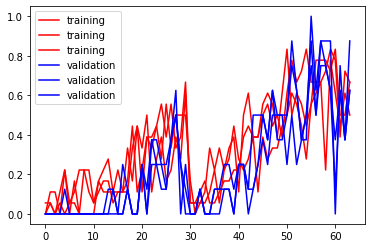

In [6]:
plt.plot(history_dict['acc'], color='r', label='training')
plt.plot(history_dict['val_acc'], color='b', label='validation')
plt.legend()
plt.savefig(f'../data/models/{model_name}_acc.jpg')
plt.show()

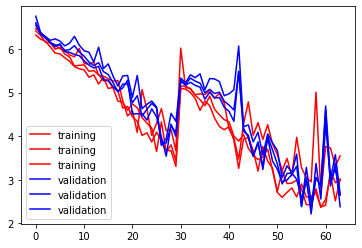

In [7]:
plt.plot(history_dict['loss'], color='r', label='training')
plt.plot(history_dict['val_loss'], color='b', label='validation')
plt.legend()
plt.savefig(f'../data/models/{model_name}_loss.jpg')
plt.show()

In [8]:
test_dir = '../data/test'
test_list = os.listdir(test_dir)
y_pred = list()
y_true = list()
acc_list = list()

for folder in test_list:
    test_x_data = list()
    test_t_data = list()
    for n in range(num_class):
        file_dir = os.path.join(test_dir, (folder+'/'+str(n)))
        file_list = os.listdir(os.path.join(test_dir, (folder+'/'+str(n))))
        temp_data = list()
        for file in file_list:
            img = cv2.imread(os.path.join(file_dir, file))
            img = np.array(img)
            # 정규화
            img = img/255
            temp_data.append(img)
        temp_data = np.array(temp_data)
        test_x_data.append(temp_data)
        test_t_data.append(n)

    # 리스트인 batch_x_data를 ndarray로
    test_x_data = np.array(test_x_data)
    test_t_data = np.array(test_t_data)

    # 축변경
    test_x_data = np.swapaxes(test_x_data,1,2)
    test_x_data = np.swapaxes(test_x_data,2,3)

    # data shuffle
    random.shuffle(shuffle_list)

    test_x_data = test_x_data[shuffle_list]
    test_t_data = test_t_data[shuffle_list]

    # one_hot_encording
    test_t_data = np.array(test_t_data)
    test_t_data = pd.DataFrame(test_t_data, columns=['t'])
    test_t_data = pd.get_dummies(test_t_data['t'])

    result = model.predict(test_x_data)
    y_pred.append(np.argmax(result, axis=1))
    y_true.append(np.argmax(test_t_data.values, axis=1))

    result = model.evaluate(x=test_x_data, y=test_t_data.values)
    acc_list.append(np.round(result, 4))

1/1 [==============================] - 0s 1ms/step - loss: 3.2715 - accuracy: 0.3846


In [ ]:
y_pred = np.array(y_pred)
print(y_pred.ravel())
y_true = np.array(y_true)
print(y_true.ravel())

result = np.equal(y_pred.ravel(), y_true.ravel())
print(np.sum(result)/len(result))

In [ ]:
acc_list = np.array(acc_list)
print(np.round(np.mean(acc_list, axis=0), 4))

In [ ]:
result = model.evaluate(x=test_x_data, y=test_t_data.values)
print(np.round(result, 4))

In [ ]:
model.save(f'../data/models/{model_name}.h5')